# Wine Classification EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Carga del dataset

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Información básica del dataset

In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Análisis de Datos Nulos

In [6]:
df.isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

## Detección de valores atípicos

### Observaciones

* La variable con el índice 13 (Proline) tiene un rango de variación mayor en comparación con las demás variables. Ésto puede provocar una escala desigual y por lo tanto puede afectar la observabilidad de patrones en las demas variables.
* Se pueden observar datos atípicos en las siguientes variables:
    - 2 (Malic acid)
    - 3 (Ash)
    - 4 (Alcalinity of ash)
    - 5 (Magnesium)
    - 9 (Proanthocyanins)
    - 10 (Color intensity)
    - 11 (Hue)

<Axes: >

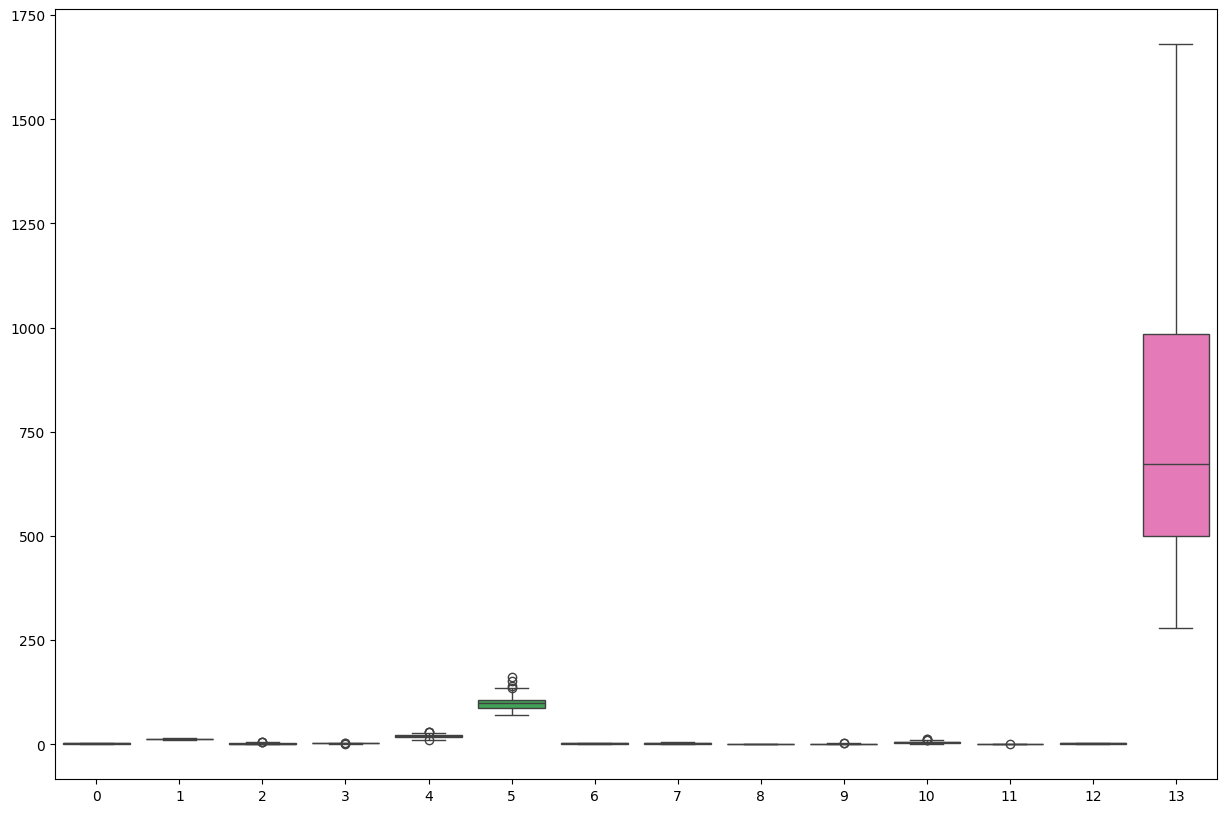

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

## Cálculo de valores atípicos por variables

* Podemos observar que las variables con más datos atípicos son las siguientes:
    - 4 (Alcalinity of ash)
    - 5 (Magnesium)
    - 10 (Color intensity)

Con 4 datos atípicos cada una

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print(outliers.sum())

0     0
1     0
2     3
3     3
4     4
5     4
6     0
7     0
8     0
9     2
10    4
11    1
12    0
13    0
dtype: int64


## Ejemplo de casos atípicos

Un ejemplo de casos atípicos es la variable Magnesium 

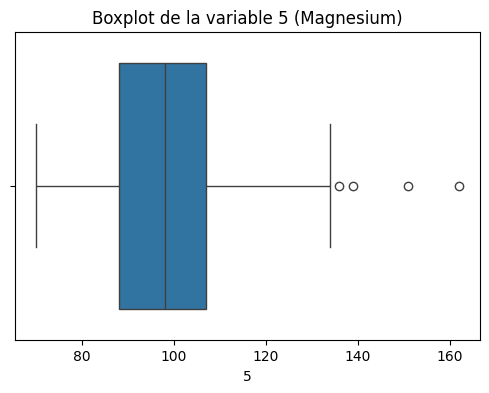

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df[5])
plt.title('Boxplot de la variable 5 (Magnesium)')
plt.show()

# Cantidad de datos por Clase

Se tienen 3 clases, podemos observar que las clases estan relativamente balanceadas, teniendo como clase mayoritaria la clase 2

In [24]:

class_distribution = df[0].value_counts()
print("----------------------Distribución de las clases---------------")
print(class_distribution)

class_proportions = df[0].value_counts(normalize=True)
print("----------------------Proporciones de Clases-------------------")
print(class_proportions)

max_class = class_distribution.max()
min_class = class_distribution.min()
imbalance_ratio = max_class / min_class
print(f"Relación de desbalance (clase mayoritaria/minoritaria): {imbalance_ratio:.2f}")


----------------------Distribución de las clases---------------
0
2    71
1    59
3    48
Name: count, dtype: int64
----------------------Proporciones de Clases-------------------
0
2    0.398876
1    0.331461
3    0.269663
Name: proportion, dtype: float64
Relación de desbalance (clase mayoritaria/minoritaria): 1.48


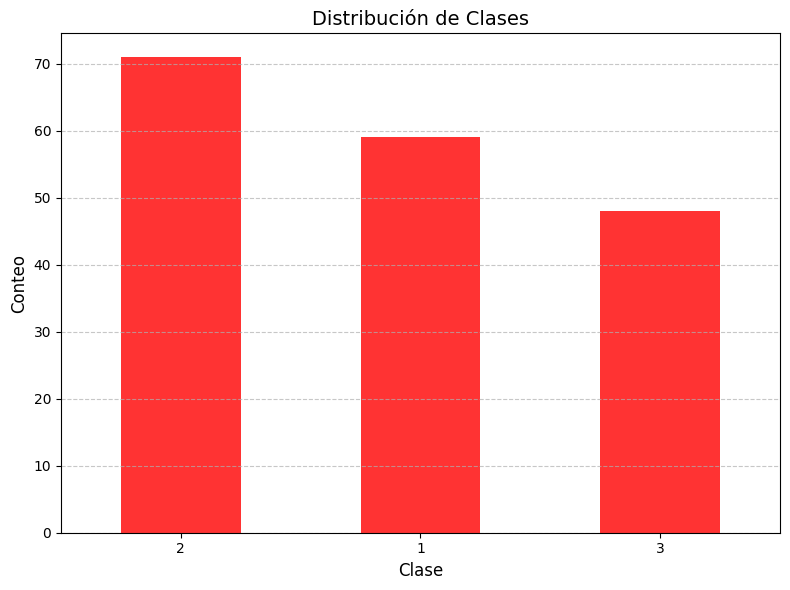

In [25]:
class_counts = df[0].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='red', alpha=0.8)
plt.title('Distribución de Clases', fontsize=14)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

